
A. 데이터 마이닝과 텍스트 마이닝

1) 데이터 마이닝

① 데이터에서 의미있는 정보를 추출하는 기술

② 고급 통계 분석과 모델링 기법을 적용하여 데이터 안의 패턴과 관계를 찾아내는 과정

2) 텍스트 마이닝

① 비정형 텍스트 데이터에서 분석 도구를 이용하여 패턴을 탐구하여 새롭고 의미있는 정보를 찾아내는 과정 또는 기술

② 비정형 텍스트 데이터를 정형화 및 특징을 추출하는 과정이 요구됨

③ 자연어 처리 기술에 기반한 텍스트 데이터 가공 기술

④ 모든 문서의 단어들을 하나하나의 변수로 보기 때문에 변수의 갯수가 매우 많아지게 됨.  즉, 일반적인 데이터마이닝에 비해 데이터의 차원이 훨씬 커지게 됨.


텍스트분류\
감정분석\
텍스트 생성(chatGPT)\
텍스트 요약\
토빅 모델링

In [1]:
#말뭉치(코퍼스, corpus) : 텍스트마이닝에 적용되는 텍스트 데이터 집합

#사전 처리

#대소문자 통일

#영문 텍스트 데이터는 대문자 또는 소문자로 변환하는 것이 좋음(보통 소문자로 변경)

s="Hello World"

print(s.lower()) #소문자로 변환

print(s.upper()) #대문자로 변환

hello world
HELLO WORLD


In [2]:
#숫자, 문장부호, 특수문자 제거

# 단어가 아니기 때문에 분석에 불필요한 경우가 대부분임

# 삭제할 경우 분석 결과가 왜곡된다고 생각될 경우 남겨둘 필요도 있음

# 날짜,수치,백분율 등의 숫자는 각각의 문장에서는 의미가 있지만

# 전체 문서 집합에서는 크게 의미가 없는 경우가 많으므로 지우는 것이 일반적

import re

#숫자 제거

p=re.compile("[0-9]+")

result=p.sub("","올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다")

print(result)

올해 들어 서울 지역의 부동산 가격이 % 하락했습니다


In [3]:
# . , ? ! 등의 문장부호들은 삭제하는 것이 일반적

# 각 문장에서는 특수한 역할을 수행할 수 있으나

# 전체 말뭉치의 관점에서는 의미를 부여하기 어려운 경우가 대부분임.

# - ( ) 등의 특수문자도 보통 삭제함

import re

def clean_text(input_data):

    #텍스트에 포함되어 있는 숫자와 특수문자 제거

    p=re.compile("[0-9_!@#$%^&*]")

    result=p.sub("",input_data)
    
    return result

txt = "올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123"

print(txt)

print(clean_text(txt))

올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123
올해 들어 서울 지역의 부동산 가격이  하락했습니다


In [4]:
#불용어 처리

#불용어 : 빈번하게 사용되지만 구체적인 의미를 찾기 어려운 단어들

#영어의 경우 the, a, an 등의 관사는 많이 사용되지만

#텍스트마이닝에서는 특별한 의미를 부여하기 힘든 경우가 많음

#NLTK : 파이썬에서 많이 사용되는 텍스트마이닝 패키지

# 언어별로 불용어 리스트 제공, *한국어는 지원하지 않음

# 한국어 불용어 리스트를 제공하는 패키지는 아직 없으며

# 직접 만들거나 다른 분석가들이 작성한 리스트를 활용해야 함

words=["추석","연휴","민족","대이동","시작","늘어","교통량","교통사고","특히","자동차", "고장","상당수","나타","것","기자"]

#불용어

stopwords=["가다","늘어","나타","것","기자"]

#불용어 제거

[i for i in words if i not in stopwords]

['추석', '연휴', '민족', '대이동', '시작', '교통량', '교통사고', '특히', '자동차', '고장', '상당수']

In [5]:
#영어 불용어 처리

import nltk

nltk.download("stopwords")

from nltk.corpus import stopwords

words=["chief","justice","roberts",",","president","carter",",","president","clinton","president","bush","obama","fellow","americans","and","people","of","the","world","thank","you"]

[w for w in words if not w in stopwords.words("english")]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['chief',
 'justice',
 'roberts',
 ',',
 'president',
 'carter',
 ',',
 'president',
 'clinton',
 'president',
 'bush',
 'obama',
 'fellow',
 'americans',
 'people',
 'world',
 'thank']

In [6]:
import nltk

nltk.download("punkt") #문장 tokenizer 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#어근 동일화 처리 : 비슷한 어근 처리(stemming)
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stm = PorterStemmer()

txt="cook cooker cooking cooks cookery"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

cook cooker cook cook cookeri 

In [8]:
stm=PorterStemmer()

#어근이 동일한 키워드 정리

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

python python python python python 

In [9]:
#LancasterStemmer : PorterStemmer와 비슷하지만 좀더 나은 성능

from nltk.stem.lancaster import LancasterStemmer

stm=LancasterStemmer()

txt="cook cooker cooking cooks cookery"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

cook cook cook cook cookery 

In [11]:
stm=LancasterStemmer()

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:
    print(stm.stem(w),end=" ")

python python python python python 

In [12]:
#Porter나 Lancaster가 처리하지 못하는 경우에는

#RegexpStemmer를 사용하여 특정한 표현식을 일괄적으로 제거함

from nltk.stem.regexp import RegexpStemmer

stm = RegexpStemmer('ing')

print(stm.stem('cooking'))

print(stm.stem('cookery'))

print(stm.stem('ingleside'))

cook
cookery
leside


In [13]:
stm=RegexpStemmer("python")

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")



ing s Python ers ed 

In [14]:
# N-gram : n번 연이어 등장하는 단어들의 연쇄

# 2회 바이그램, 3회 트라이그램, 보편적으로 영어에만 적용되며 바이그램이 주로 사용됨

txt = 'Hello'

# 2-gram이므로 문자열의 끝에서 한 글자 앞까지만 반복함

for i in range(len(txt) - 1):            

    # 현재 문자와 그다음 문자 출력

    print(txt[i], txt[i + 1], sep='') 

He
el
ll
lo


In [15]:
txt = 'this is python script'

# 공백을 기준으로 문자열을 분리하여 리스트로 저장

words = txt.split()                

# 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함

for i in range(len(words) - 1):      

    # 현재 문자열과 그다음 문자열 출력
    print(stm.stem(w),end=" ")

ed ed ed 

In [16]:
#Porter나 Lancaster가 처리하지 못하는 경우에는

#RegexpStemmer를 사용하여 특정한 표현식을 일괄적으로 제거함

from nltk.stem.regexp import RegexpStemmer

stm = RegexpStemmer('ing')

print(stm.stem('cooking'))

print(stm.stem('cookery'))

print(stm.stem('ingleside'))

cook
cookery
leside


In [17]:
stm=RegexpStemmer("python")

txt="pythoning pythons Python pythoners pythoned"

words=word_tokenize(txt)

for w in words:

    print(stm.stem(w),end=" ")

ing s Python ers ed 

In [18]:
# N-gram : n번 연이어 등장하는 단어들의 연쇄

# 2회 바이그램, 3회 트라이그램, 보편적으로 영어에만 적용되며 바이그램이 주로 사용됨

txt = 'Hello'

# 2-gram이므로 문자열의 끝에서 한 글자 앞까지만 반복함

for i in range(len(txt) - 1):            

    # 현재 문자와 그다음 문자 출력

    print(txt[i], txt[i + 1], sep='')

He
el
ll
lo


In [20]:
txt = 'this is python script'

# 공백을 기준으로 문자열을 분리하여 리스트로 저장

words = txt.split()                

# 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함

for i in range(len(words) - 1):      

    # 현재 문자열과 그다음 문자열 출력
     print(words[i], words[i + 1])

this is
is python
python script


In [21]:
txt = 'hello'

two_gram = zip(txt, txt[1:])

for i in two_gram:

    print(i[0], i[1], sep='')

he
el
ll
lo


In [22]:
txt = 'this is python script'

words = txt.split()

list(zip(words, words[1:]))

[('this', 'is'), ('is', 'python'), ('python', 'script')]

In [23]:
from nltk import ngrams

sentence="I love you.  Good morning.  Good bye."

grams=ngrams(sentence.split(),2)

for gram in grams:

    print(gram,end=" ")

('I', 'love') ('love', 'you.') ('you.', 'Good') ('Good', 'morning.') ('morning.', 'Good') ('Good', 'bye.') 

In [24]:
sentence="I love you.  Good morning.  Good bye."

grams=ngrams(sentence.split(),3)

for gram in grams:

    print(gram,end=" ")

('I', 'love', 'you.') ('love', 'you.', 'Good') ('you.', 'Good', 'morning.') ('Good', 'morning.', 'Good') ('morning.', 'Good', 'bye.') 

In [48]:
#한국어 처리

#헌법 말뭉치
from konlpy.corpus import kolaw

#말뭉치에 포함된 파일 목록

print(kolaw.fileids())

c = kolaw.open('constitution.txt').read()
print(c[:40])

['constitution.txt']
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [49]:
#국회의안 말뭉치

from konlpy.corpus import kobill

print(kobill.fileids())

d = kobill.open('1809890.txt').read()

print(d[:40])

['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt', '1809895.txt', '1809896.txt', '1809897.txt', '1809898.txt', '1809899.txt']
지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [29]:
#품사 분석

# POS 태깅(Part-Of-Speech)

# 모든 언어에 명사,동사,형용사,부사는 공통적으로 존재함

#한나눔 패키지 - KAIST Semantic Web Research Center 개발

#    http://semanticweb.kaist.ac.kr/hannanum/

#pip install konlpy

#pip install tweepy==3.10.0

#pip install jpype1==1.0.2

#jdk8 버전 설치(java 최신버전은 잘 호환되지 않을 수 있음)

from konlpy.tag import Hannanum

han=Hannanum()

txt="""원/달러 환율이 3년 5개월 만에 최고치로 마감하고,

위안화 환율이 11년 만에 달러당 7위안을 넘었다.

원/엔 재정환율 역시 100엔당 30원 가까이 뛰었다."""

#형태소 분석

print(han.morphs(txt))

['원', '/', '달러', '환율', '이', '3년', '5개월', '만', '에', '최고치', '로', '마감', '하고', ',', '위안화', '환율', '이', '11년', '만', '에', '달러당', '7위', '안', '을', '넘', '었다', '.', '원', '/', '엔', '재정환율', '역시', '100엔', '당', '30원', '가까이', '뛰', '었다', '.']


In [30]:
print(han.nouns(txt)) #명사 추출

['원', '달러', '환율', '3년', '5개월', '만', '최고치', '마감', '위안화', '환율', '11년', '만', '달러당', '7위', '원', '엔', '재정환율', '100엔', '30원']


In [32]:
#형태소와 품사

print(han.pos(txt))
print(han.tagset) #품사 목록

[('원', 'N'), ('/', 'S'), ('달러', 'N'), ('환율', 'N'), ('이', 'J'), ('3년', 'N'), ('5개월', 'N'), ('만', 'N'), ('에', 'J'), ('최고치', 'N'), ('로', 'J'), ('마감', 'N'), ('하고', 'J'), (',', 'S'), ('위안화', 'N'), ('환율', 'N'), ('이', 'J'), ('11년', 'N'), ('만', 'N'), ('에', 'J'), ('달러당', 'N'), ('7위', 'N'), ('안', 'X'), ('을', 'J'), ('넘', 'P'), ('었다', 'E'), ('.', 'S'), ('원', 'N'), ('/', 'S'), ('엔', 'N'), ('재정환율', 'N'), ('역시', 'M'), ('100엔', 'N'), ('당', 'X'), ('30원', 'N'), ('가까이', 'M'), ('뛰', 'P'), ('었다', 'E'), ('.', 'S')]
{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사', 'NQ': '고유명사', 'P': '용언', 'PA': '형용사', 'PV': '동사', 'PX': '보조 용언', 'S': '기호', 'X': '접사', 'XP': '접두사', 'XS': '접미사'}


In [33]:
#꼬꼬마 패키지 - 서울대학교 IDS(Intelligent Data Systems) 연구실 개발

#    http://kkma.snu.ac.kr/

from konlpy.tag import Kkma

kkm=Kkma()

print(kkm.morphs(txt)) #형태소 분석

['원', '/', '달러', '환율', '이', '3', '년', '5', '개월', '만', '에', '최고', '치', '로', '마감', '하', '고', ',', '위', '안화', '환율', '이', '11', '년', '만', '에', '달', '러', '당', '7', '위', '안', '을', '넘', '었', '다', '.', '원', '/', '엔', '재정', '환율', '역시', '100', '엔', '당', '30', '원', '가까이', '뛰', '었', '다', '.']


In [34]:
print(kkm.nouns(txt))

['원', '달러', '환율', '3', '3년', '년', '5', '5개월', '개월', '만', '최고', '마감', '위', '위안화', '안화', '11', '11년', '당', '7', '7위안', '안', '엔', '재정', '재정환율', '100', '100엔당', '엔', '30', '30원']


In [35]:
print(kkm.pos(txt))

[('원', 'NNM'), ('/', 'SP'), ('달러', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('3', 'NR'), ('년', 'NNM'), ('5', 'NR'), ('개월', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('최고', 'NNG'), ('치', 'XSN'), ('로', 'JKM'), ('마감', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), (',', 'SP'), ('위', 'NNG'), ('안화', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('11', 'NR'), ('년', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('달', 'VV'), ('러', 'ECD'), ('당', 'NNG'), ('7', 'NR'), ('위', 'NNG'), ('안', 'NNG'), ('을', 'JKO'), ('넘', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('원', 'NNM'), ('/', 'SP'), ('엔', 'NNG'), ('재정', 'NNG'), ('환율', 'NNG'), ('역시', 'MAG'), ('100', 'NR'), ('엔', 'NNM'), ('당', 'NNG'), ('30', 'NR'), ('원', 'NNM'), ('가까이', 'MAG'), ('뛰', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [36]:
print(kkm.tagset) #품사 목록

{'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형 종결 어미', 'EFR': '존칭형 종결 어미', 'EP': '선어말 어미', 'EPH': '존칭 선어말 어미', 'EPP': '공손 선어말 어미', 'EPT': '시제 선어말 어미', 'ET': '전성 어미', 'ETD': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JK': '조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKI': '호격 조사', 'JKM': '부사격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JX': '보조사', 'MA': '부사', 'MAC': '접속 부사', 'MAG': '일반 부사', 'MD': '관형사', 'MDN': '수 관형사', 'MDT': '일반 관형사', 'NN': '명사', 'NNB': '일반 의존 명사', 'NNG': '보통명사', 'NNM': '단위 의존 명사', 'NNP': '고유명사', 'NP': '대명사', 'NR': '수사', 'OH': '한자', 'OL': '외국어', 'ON': '숫자', 'SE': '줄임표', 'SF': '마침표, 물음표, 느낌표', 'SO': '붙임표(물결,숨김,빠짐)', 'SP': '쉼표,가운뎃점,콜론,빗금', 'SS': '따옴표,괄호표,줄표', 'SW': '기타기호 (논리수학기호,화폐기호)', 'UN': '명사추정범주', 'VA': '형용사', 'VC': '지정사', 'VCN': "부정 지정사, 형용사 '아니다'", 'VCP': "긍정 지정사, 서술격 조사 '이다'", 'VV': '동사', 'VX': '보조 용언', '

In [37]:
#트위터 패키지 - 트위터에서 개발, 2017년 이후 오픈코리안텍스트로 이름이 바뀜

#  https://github.com/twitter

from konlpy.tag import Okt

okt=Okt()

print(okt.morphs(txt)) #형태소 분석

['원', '/', '달러', '환율', '이', '3년', '5', '개월', '만에', '최고', '치', '로', '마감', '하고', ',', '\n\n', '위안화', '환율', '이', '11년', '만에', '달러', '당', '7위안', '을', '넘었다', '.', '\n\n', '원', '/', '엔', '재정', '환율', '역시', '100엔', '당', '30원', '가까이', '뛰었다', '.']


In [38]:
print(okt.nouns(txt))

['원', '달러', '환율', '개월', '최고', '치', '마감', '위안화', '환율', '달러', '원', '재정', '환율', '역시', '가까이']


In [39]:
print(okt.pos(txt))

[('원', 'Noun'), ('/', 'Punctuation'), ('달러', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('3년', 'Number'), ('5', 'Number'), ('개월', 'Noun'), ('만에', 'Josa'), ('최고', 'Noun'), ('치', 'Noun'), ('로', 'Josa'), ('마감', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('\n\n', 'Foreign'), ('위안화', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('11년', 'Number'), ('만에', 'Josa'), ('달러', 'Noun'), ('당', 'Suffix'), ('7위안', 'Number'), ('을', 'Foreign'), ('넘었다', 'Verb'), ('.', 'Punctuation'), ('\n\n', 'Foreign'), ('원', 'Noun'), ('/', 'Punctuation'), ('엔', 'Josa'), ('재정', 'Noun'), ('환율', 'Noun'), ('역시', 'Noun'), ('100엔', 'Number'), ('당', 'Foreign'), ('30원', 'Number'), ('가까이', 'Noun'), ('뛰었다', 'Verb'), ('.', 'Punctuation')]


In [40]:
print(okt.tagset)

{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


In [41]:
#어구 추출

print(okt.phrases(txt))

['달러', '달러 환율', '3년', '3년 5개월', '최고치', '마감', '위안화', '위안화 환율', '11년', '달러당', '달러당 7위안', '재정환율', '재정환율 역시', '재정환율 역시 100엔', '30원', '30원 가까이', '환율', '개월', '최고', '7위안', '재정', '역시', '100엔', '가까이']


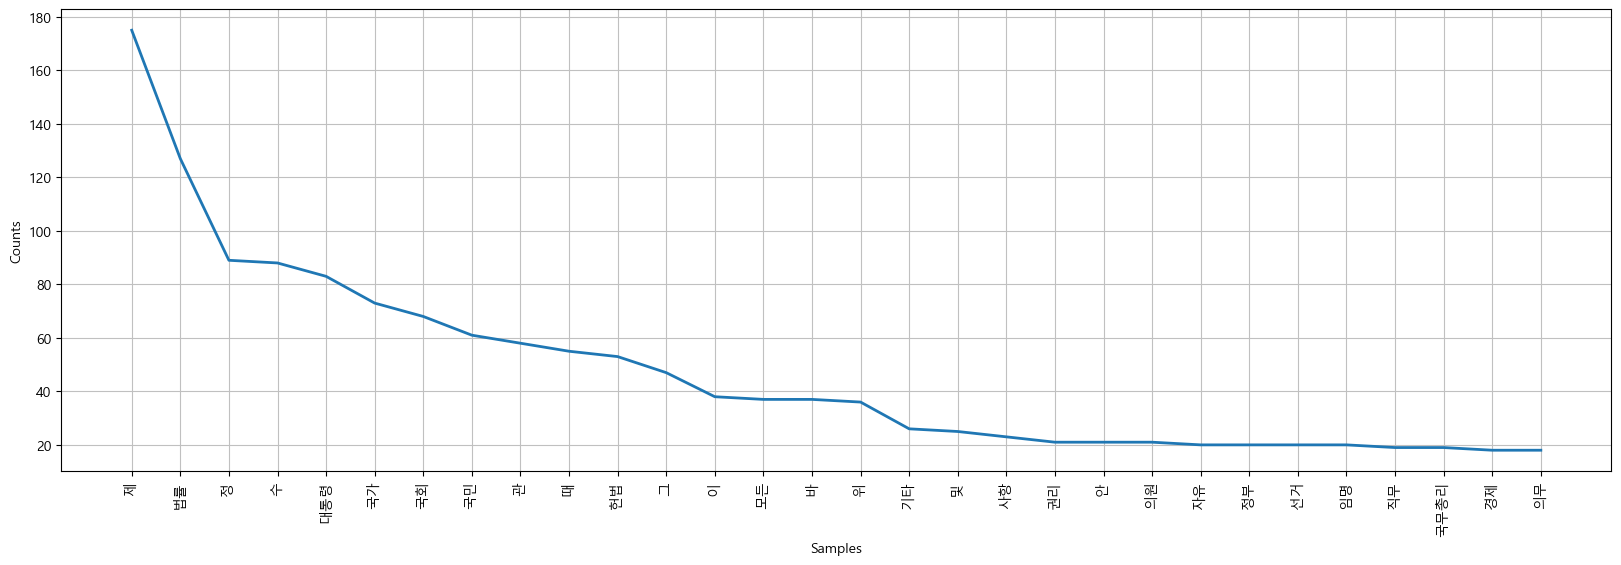

In [42]:
#단어 출현 빈도

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from nltk import Text

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


plt.figure(figsize=(20,6))
kolaw = Text(okt.nouns(c), name="kolaw")  # 뭐하는것?
kolaw.plot(30)
plt.show()

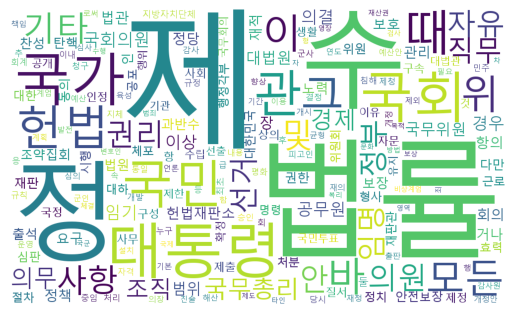

In [43]:
# 에러가 발생할 경우 

# visual studio 재배포 패키지 설치 후 (vc_redist_x64.exe)

# https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

# python 버전에 맞는 whl 파일 다운로드

# 로컬디렉토리에 있는 파일로 설치

# pip install wordcloud-버전-cp39-cp39-win_amd64.whl

from wordcloud import WordCloud

font_path = 'c:/windows/fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)

plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))

plt.axis("off")

plt.show()

In [44]:
#영어 품사 분석

import nltk

nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [45]:
from nltk import pos_tag

a="I love you."

tags=pos_tag(a.split())

print(tags)

[('I', 'PRP'), ('love', 'VBP'), ('you.', 'RB')]


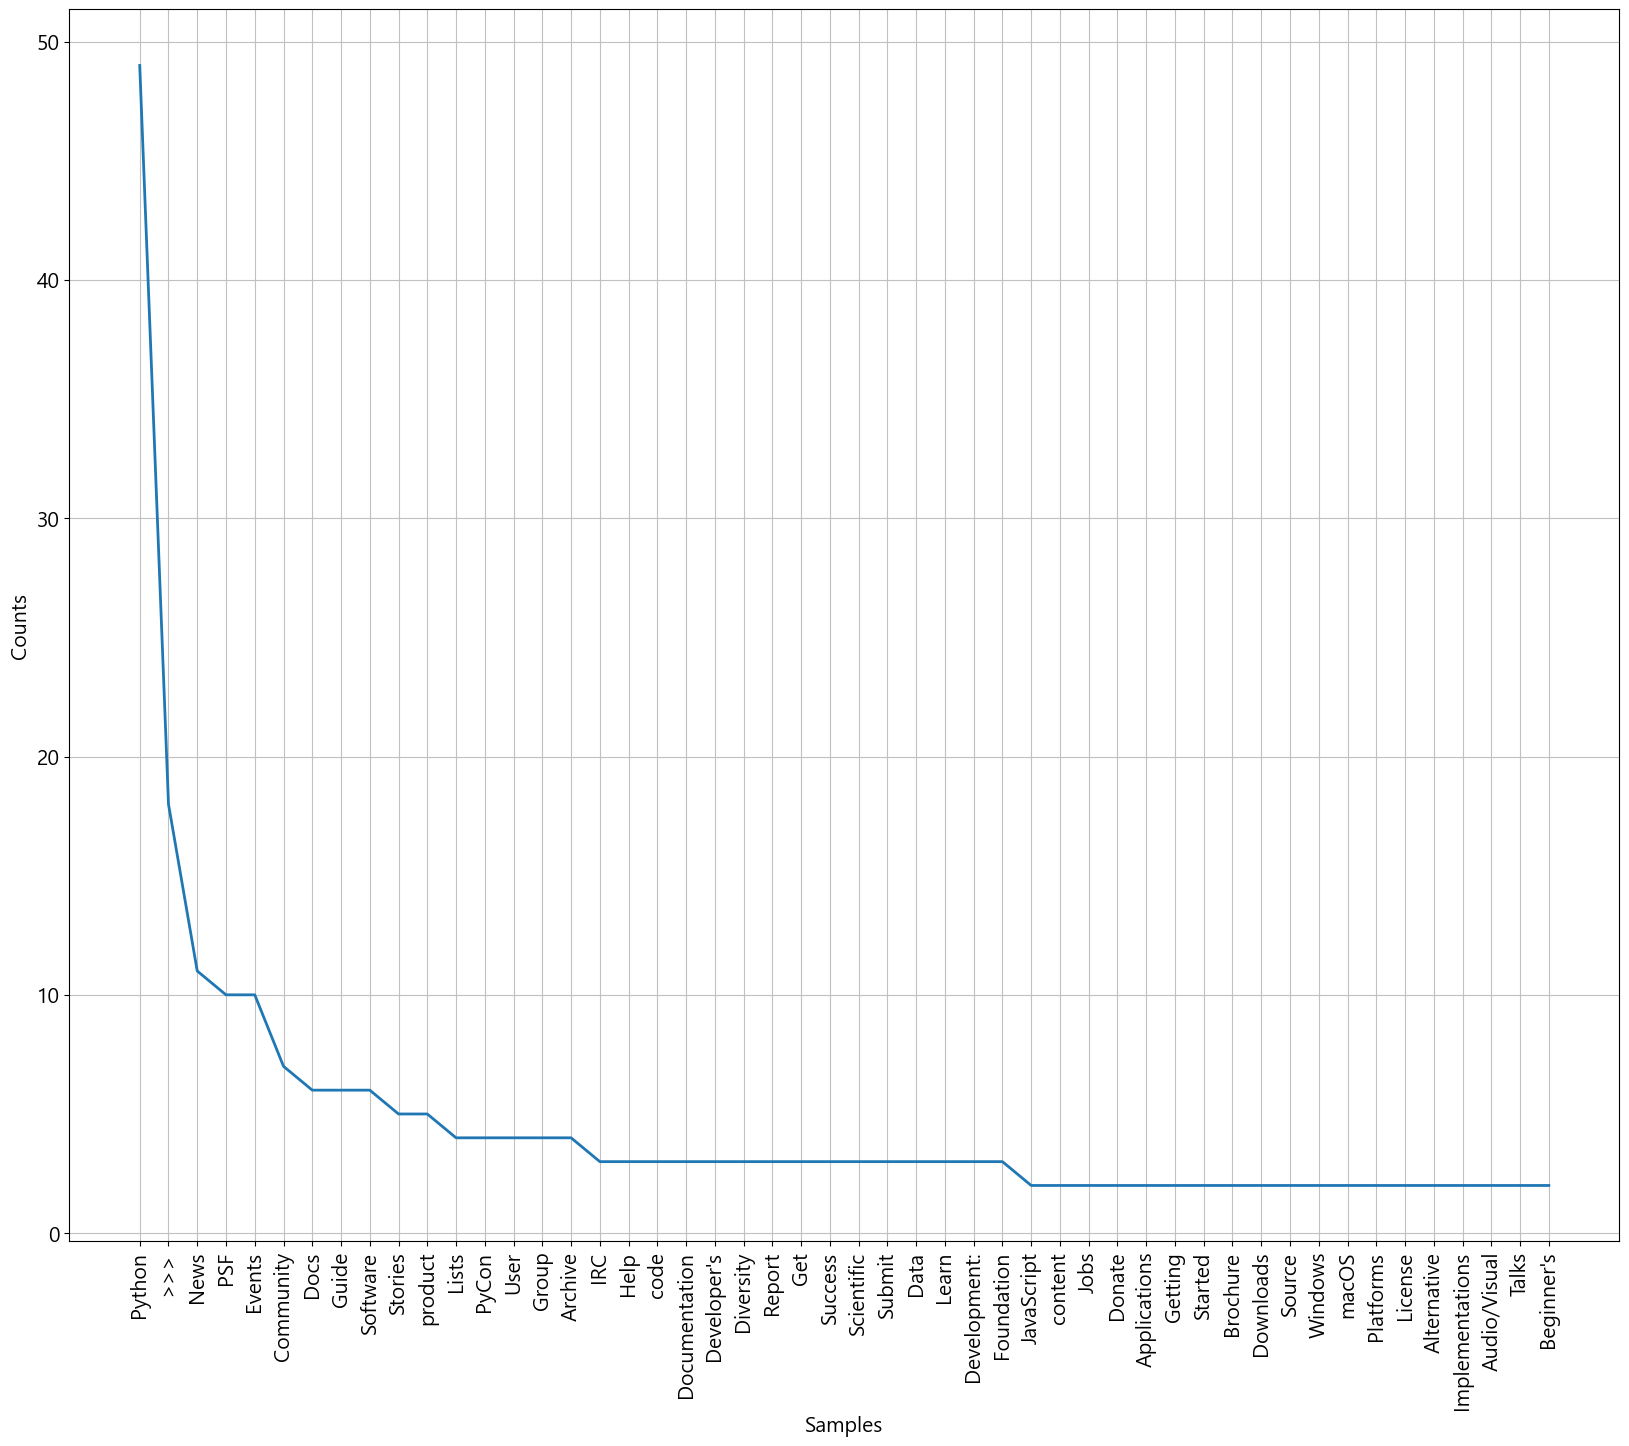

<Axes: xlabel='Samples', ylabel='Counts'>

In [46]:
import urllib

import re

from bs4 import BeautifulSoup

from nltk.corpus import stopwords  

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(20,16)

plt.rcParams["font.size"]=15

res=urllib.request.urlopen('http://python.org/')

html=res.read()

#알파벳,숫자,_ 문자들만 선택

tokens=re.split('\W+',html.decode('utf-8'))

clean=BeautifulSoup(html,'html.parser').get_text()  

tokens=[token for token in clean.split()]

stop=set(stopwords.words('english'))

clean_tokens= [token for token in tokens

               if len(token.lower())>1 and (token.lower() not in stop)]

tagged=nltk.pos_tag(clean_tokens)

#보통명사, 고유명사만 추출

allnoun=[word for word,pos in tagged if pos in ['NN','NNP']]

freq_result = nltk.FreqDist(allnoun)

freq_result.plot(50, cumulative=False)

### 2) NLTK 패키지

In [50]:
# 말뭉치(corpus) : 자연어 분석 작업을 위해 만든 문서 집합

import nltk

# NLTK 패키지에서 제공하는 샘플 말뭉치 다운로드, 시간이 많이 걸림

nltk.download("book", quiet=True)

True

In [51]:
from nltk.book import *

#저작권이 만료된 문학작품이 포함된 말뭉치

nltk.corpus.gutenberg.fileids()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [52]:
#제인 오스틴의 엠마 문서

emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")

print(emma_raw[:500])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [53]:
# 자연어 문서를 분석하기 위해서는 우선 긴 문자열을 분석을 위한 작은 단위로 나누어야 한다.

# 이 문자열 단위를 토큰(token)이라고 하고

# 이렇게 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라고 함

# 영문의 경우에는 문장, 단어 등을 토큰으로 사용하거나 정규 표현식을 쓸 수 있다.

# 문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 한다.

# 토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.

from nltk.tokenize import sent_tokenize

print(sent_tokenize(emma_raw[:1000])[3]) #3번 문장

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [55]:
from nltk.tokenize import word_tokenize

word_tokenize(emma_raw[50:100]) #50~99 단어

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [56]:
# 형태소 : 일정한 의미가 있는 가장 작은 말의 단위

# 형태소 분석(morphological analysis) :

#   단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고

#   이를 이용하여 형태소를 찾아내거나 처리하는 작업

# 어간 추출(stemming), 원형 복원(lemmatizing), 품사 부착(Part-Of-Speech tagging)

# 어간 추출(stemming) : 단어의 접미사나 어미를 제거

# 어간 추출법은 단순히 어미를 제거할 뿐이므로 단어의 원형의 정확히 찾아주지는 않는다.

In [57]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()

st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print( [st1.stem(w) for w in words] )

print( [st2.stem(w) for w in words] )

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [58]:
import nltk  

nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...


True

In [59]:
#원형 복원 : 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업

#품사를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.

from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

words = ["fly", "flies", "flying", "flew", "flown"]

#동사원형
[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [60]:
#품사의 예

# NNP: 단수 고유명사

# VB: 동사

# VBP: 동사 현재형

# NN: 명사

#품사 목록

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [61]:
#품사에 대한 설명

nltk.help.upenn_tagset("VB")



VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


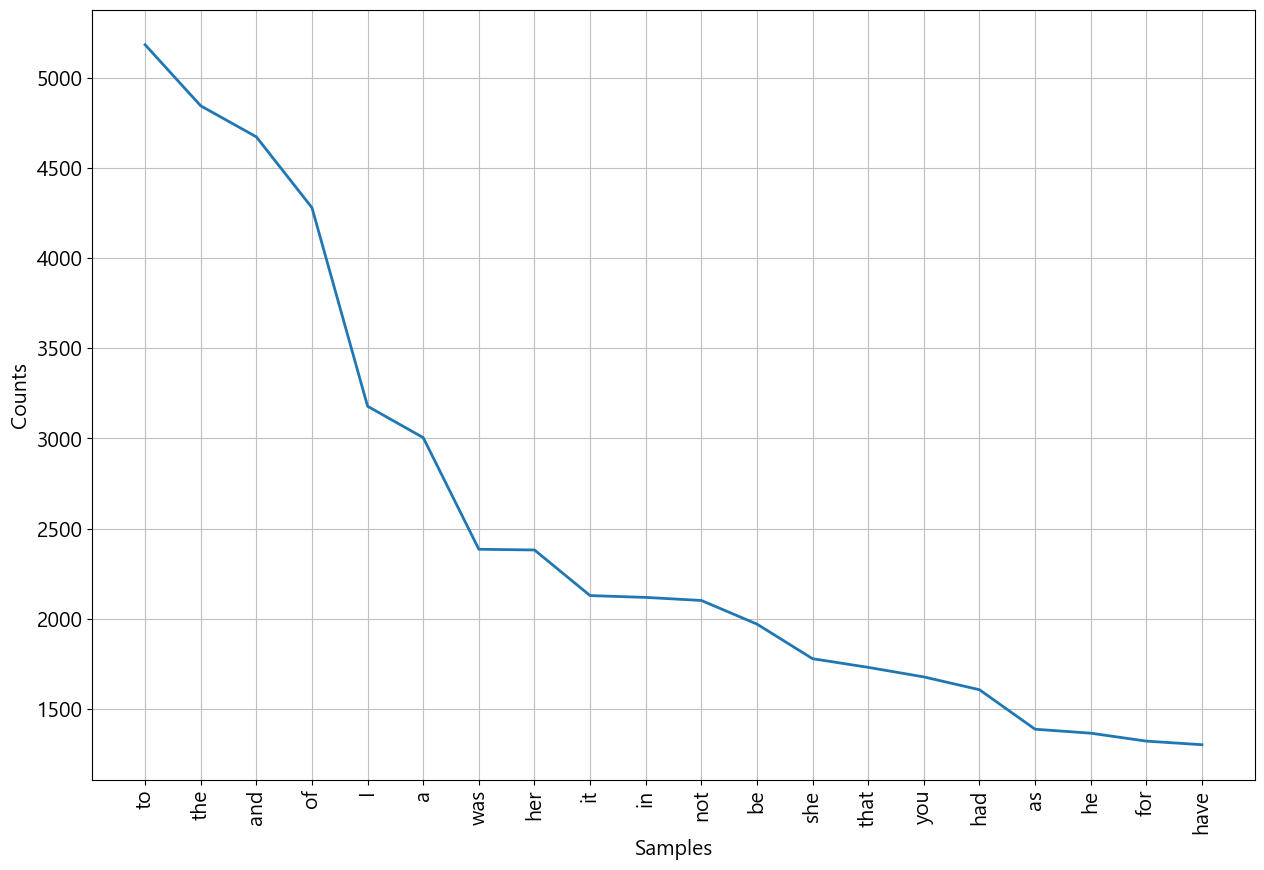

In [62]:
#각 단어의 사용 빈도를 그래프로 출력

from nltk import Text

import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer

retokenize = RegexpTokenizer("[\w]+") #특수문자 제거

#retokenize.tokenize(emma_raw[50:100])

text = Text(retokenize.tokenize(emma_raw))

plt.rcParams["figure.figsize"]=(15,10)

plt.rcParams["font.size"]=15

text.plot(20) #상위 20개의 단어 출력

plt.show()

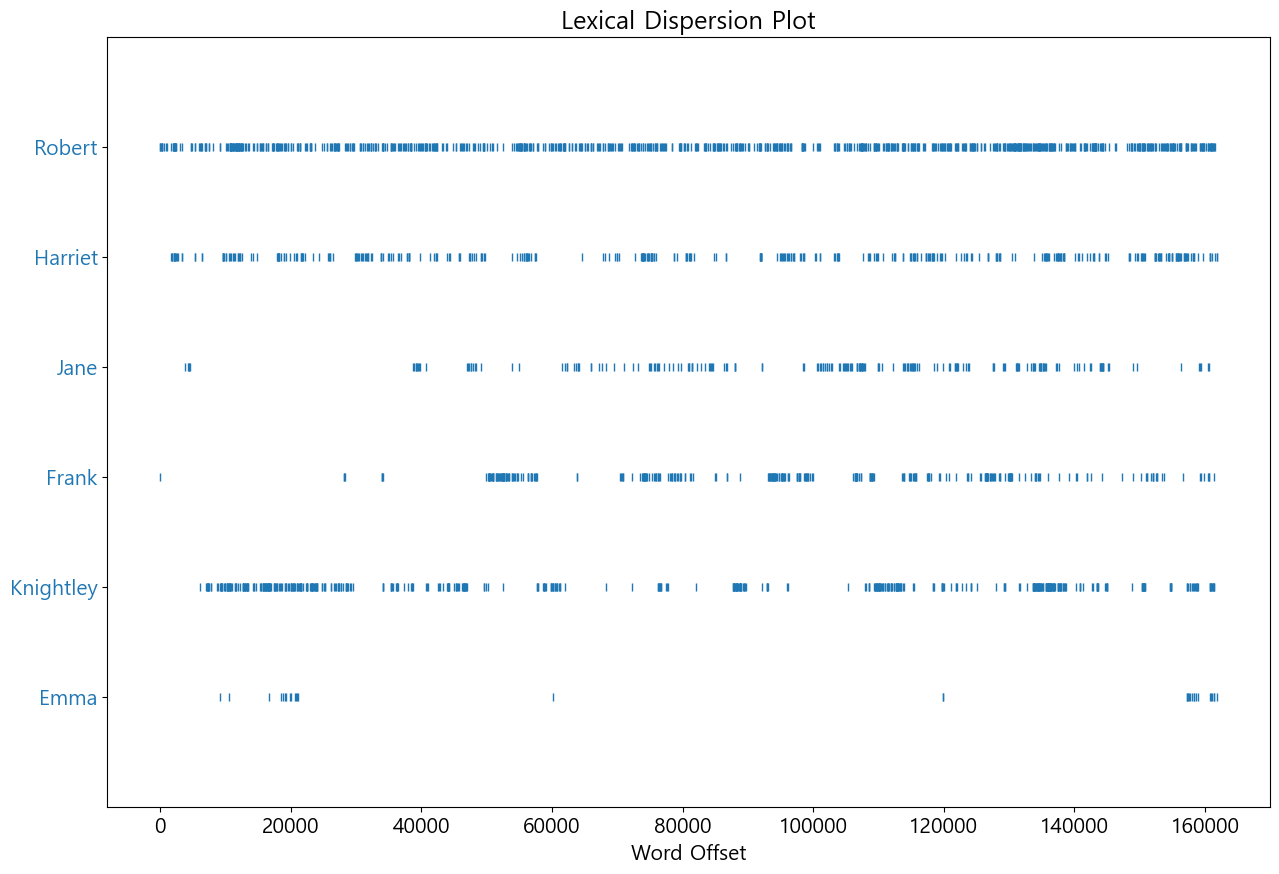

In [64]:
#단어가 사용된 위치를 시각화

#소설 엠마의 각 등장인물에 대해 적용
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [65]:
#단어가 사용된 위치를 표시

#해당 단어의 앞뒤에 사용된 단어

text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [66]:
#같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들

text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [67]:
#두 단어가 공통적으로 들어갈 수 있는 문맥 확인

text.common_contexts(['Emma','she'])

# 밑줄 부분에 Emma와 she가 들어갈 경우 같은 의미가 됨

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


In [68]:
from nltk import FreqDist

from nltk.tag import pos_tag

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]

emma_tokens = pos_tag(retokenize.tokenize(emma_raw))

# NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거

names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]

#FreqDist : 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스

#Emma 말뭉치에서 사람의 이름만 모아서 FreqDist 클래스 객체 생성

fd_names = FreqDist(names_list)

#전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률

fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

#most_common 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

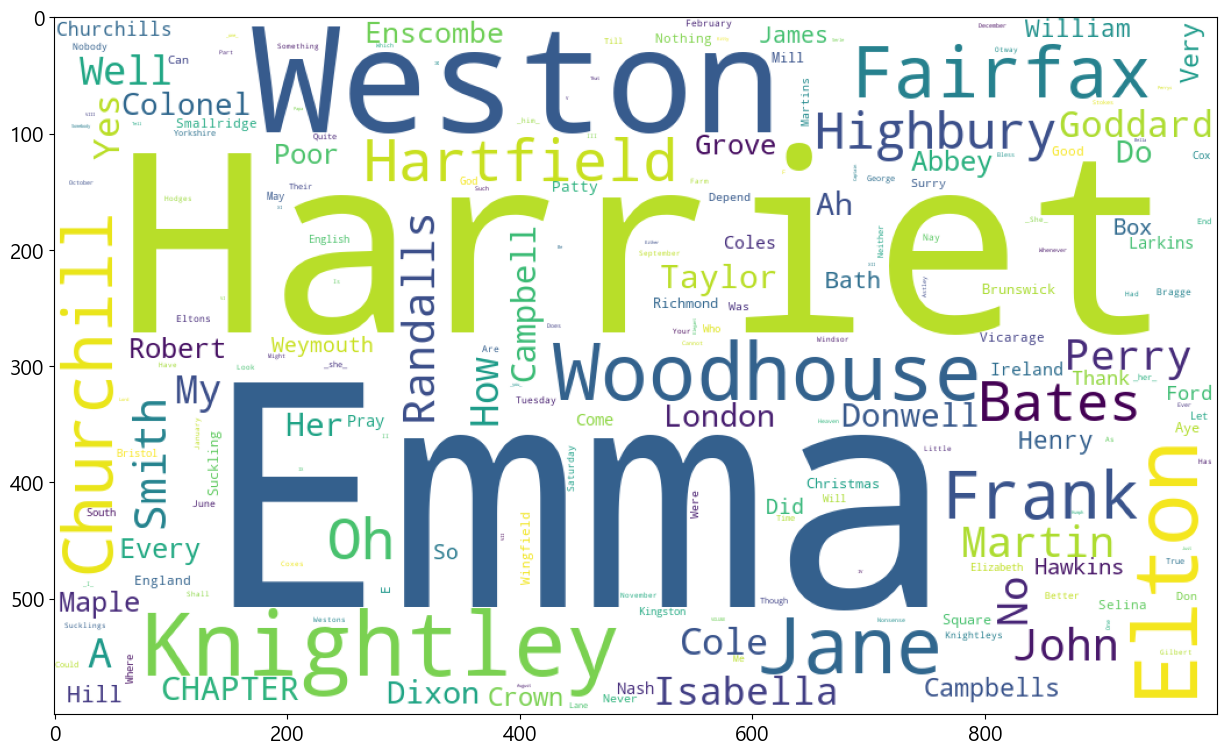

In [69]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)

plt.imshow(wc.generate_from_frequencies(fd_names))

plt.show()

### 3. 단어빈도 분석

In [70]:
#단어빈도분석 : 전체 문서 또는 문서별 단어의 출현 빈도

f = open('./DATA/warandpeace.txt',encoding='utf-8')

lines = f.readlines()

f.close()

print(lines[1][:500])

The Project Gutenberg eBook of War and Peace, by Leo Tolstoy



In [73]:
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords

#숫자,특수문자 제거
tokenizer = RegexpTokenizer('[\w]+')

#불용어 사전
stop_words = stopwords.words('english')

#모든 단어를 소문자로 변환
words=''
for line in lines:
    words +=  line.lower()
#print(words)


#단어 단위로 토큰화
tokens = tokenizer.tokenize(words)

#불용어 제거
tokens2 = [i for i in list(tokens) if not i in stop_words]

#글자수 1인 단어들 제거
tokens3= [i for i in tokens2 if len(i)>1]

In [74]:
import pandas as pd
#출현 빈도가 높은 단어들

pd.Series(tokens3).value_counts().head(10)

said       2842
one        2134
pierre     1963
prince     1929
would      1366
natásha    1213
man        1189
andrew     1144
could      1116
time        929
dtype: int64

Counter({'said': 2842, 'one': 2134, 'pierre': 1963, 'prince': 1929, 'would': 1366, 'natásha': 1213, 'man': 1189, 'andrew': 1144, 'could': 1116, 'time': 929, 'princess': 916, 'face': 893, 'french': 881, 'went': 862, 'know': 847, 'old': 835, 'eyes': 827, 'men': 792, 'rostóv': 776, 'room': 771, 'thought': 767, 'go': 755, 'like': 751, 'well': 746, 'see': 734, 'chapter': 732, 'count': 726, 'moscow': 722, 'began': 718, 'come': 684, 'came': 683, 'still': 676, 'without': 675, 'asked': 668, 'mary': 668, 'army': 665, 'looked': 651, 'say': 640, 'first': 633, 'nicholas': 633, 'emperor': 631, 'felt': 631, 'another': 620, 'life': 618, 'away': 617, 'left': 611, 'something': 601, 'two': 595, 'seemed': 583, 'napoleon': 578, 'head': 568, 'day': 567, 'yes': 561, 'people': 560, 'little': 557, 'long': 545, 'hand': 541, 'whole': 532, 'kutúzov': 529, 'back': 520, 'even': 512, 'general': 506, 'heard': 498, 'good': 497, 'way': 494, 'countess': 488, 'must': 482, 'look': 475, 'nothing': 473, 'always': 464, 'saw'

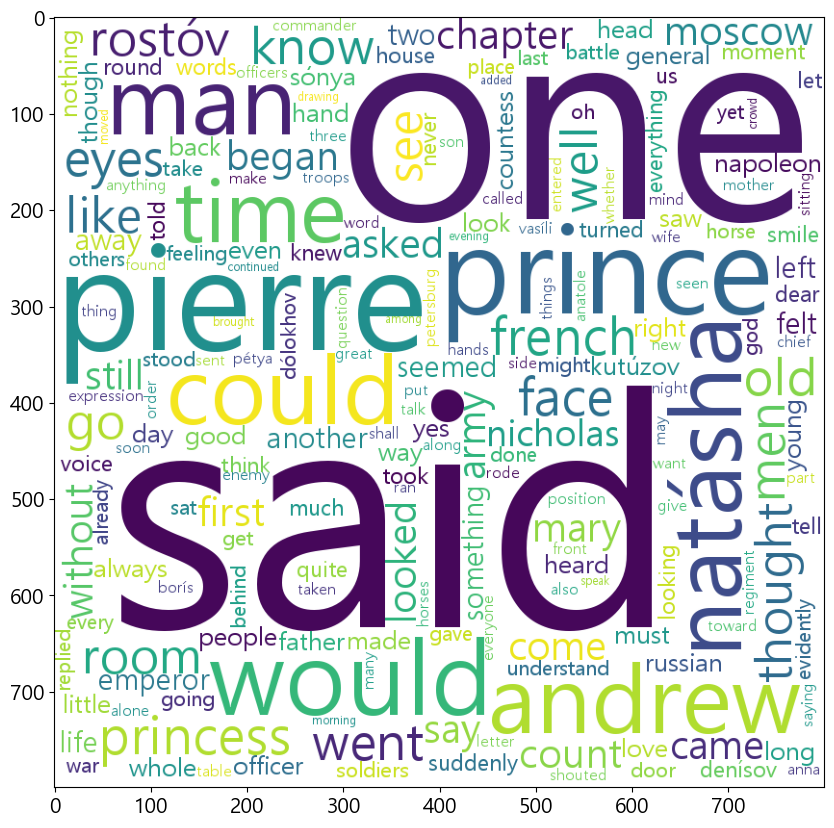

In [75]:
#워드 클라우드
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

#폰트 경로, 워드클라우드의 가로,세로 사이즈
wordcloud = WordCloud(
    font_path = 'c:/windows/fonts/malgun.ttf',
    width = 800,
    height = 800,
    background_color="white"
)

#단어별 출현횟수 저장

count = Counter(tokens3)

print(count)

wordcloud = wordcloud.generate_from_frequencies(count)

plt.imshow(wordcloud)

plt.show()

In [79]:
#뉴스 기사를 하나 찾아서 news1.txt로 저장

f = open("./DATA/news1.txt", encoding='utf8')

lines = f.readlines()

f.close()

In [80]:
#한나눔 형태소 분석기

from konlpy.tag import Hannanum

han = Hannanum()

temp = []

for i in range(len(lines)):

    #명사만 추출

    a=lines[i].strip()

    temp.append(han.nouns(a))

In [81]:
# 2차원 리스트를 1차원 리스트로 변환하는 함수

def flatten(items):

    flatList = []

    for elem in items:

        if type(elem) == list:

            for e in elem:

                flatList.append(e)

        else:

            flatList.append(elem)

    return flatList

word_list=flatten(temp)

# 두글자 이상인 단어만 추출

word_list=pd.Series([x for x in word_list if len(x)>1])

#단어별 출현 빈도

word_list.value_counts().head(10)

미국     5
주장     4
그러쉬    4
청문회    4
정부     4
정보     4
존재     4
증언     4
활동     3
외계     3
dtype: int64

In [82]:
#불용어 처리

stopwords=['전날','오전']

word_list2=[i for i in word_list if i not in stopwords]

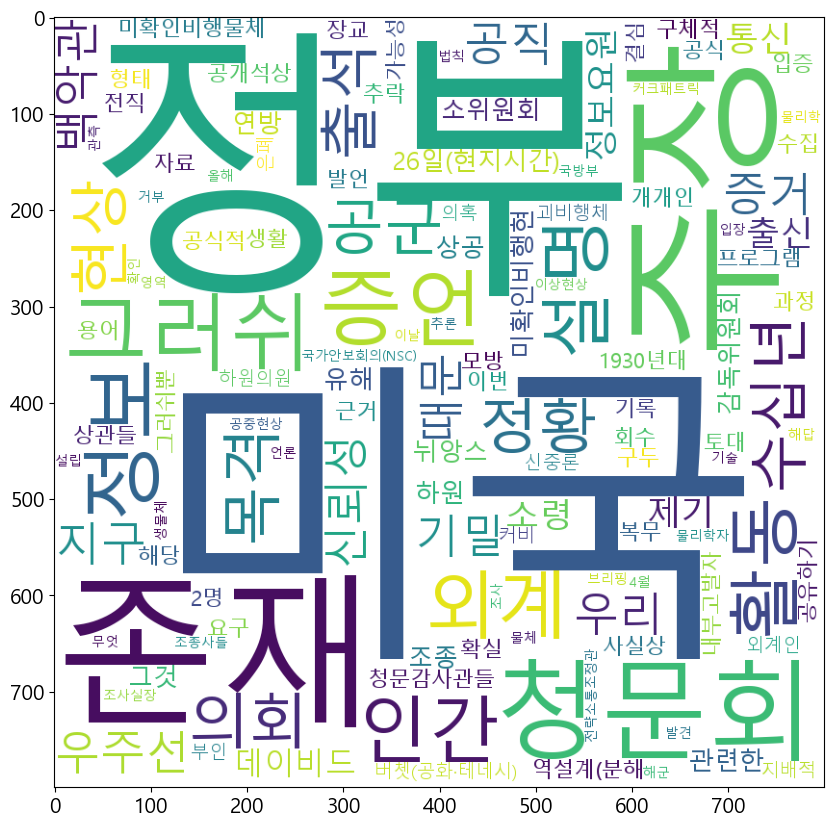

In [83]:
# 한글 뉴스를 워드클라우드로 출력

from collections import Counter

from wordcloud import WordCloud

wordcloud=WordCloud( font_path='c:/windows/fonts/malgun.ttf', width=800,height=800,background_color='white')

import matplotlib.pyplot as plt

count=Counter(word_list2)

wordcloud=wordcloud.generate_from_frequencies(count)

plt.figure(figsize=(10, 10))

plt.imshow(wordcloud)

plt.show()